In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import anndata as ad
import zipfile
from tqdm import tqdm
import os
from scipy.stats import pearsonr

In [4]:
df = pd.read_parquet("val_embeddings.parquet")

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
3dkz-A,-0.056899,0.067785,0.043070,-0.115610,-0.170185,-0.025701,0.011595,-0.054203,-0.042449,-0.056029,...,0.119345,-0.051736,0.002881,0.018177,0.002368,0.057894,0.032179,-0.067931,0.037583,-0.012750
4ci9-A,0.038531,-0.120041,-0.012698,0.074748,0.001386,-0.027984,0.055145,-0.064594,-0.018383,0.080394,...,0.006587,-0.011378,-0.033902,0.091830,-0.007685,-0.120685,0.088574,-0.164871,-0.097639,0.183372
5kc1-B,0.041849,-0.067319,-0.011767,0.032519,-0.073469,-0.000349,0.001167,0.017907,0.107972,-0.070927,...,0.043593,-0.054850,-0.098421,0.067382,0.062382,-0.041538,0.063627,0.021009,-0.063348,0.002969
2v03-A,-0.021607,-0.036442,0.049148,0.011513,-0.047167,-0.043972,0.052664,-0.134598,0.008304,0.031522,...,0.005961,-0.063492,-0.030979,-0.061250,0.003012,-0.015919,0.051334,-0.128678,-0.003821,0.025303
1i1q-A,-0.028871,-0.005588,0.018180,0.026278,-0.099713,-0.015516,0.050186,-0.060195,0.000994,0.065243,...,0.043932,-0.085854,-0.143188,0.064479,-0.071481,-0.020941,0.055646,-0.148438,-0.015635,0.071493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4g7n-A,0.029371,0.053620,0.066794,0.017368,-0.083916,-0.046757,-0.007204,0.072373,0.067171,0.077110,...,0.189172,0.005058,-0.026602,0.006974,0.008518,0.021099,0.077223,-0.070113,0.038129,0.083685
1gxr-A,-0.019135,0.042602,0.031135,0.009654,-0.123860,0.004597,0.057659,-0.035003,0.027752,0.111310,...,0.046149,-0.017277,-0.113022,0.006824,0.060937,0.019431,-0.019143,-0.057327,-0.097240,0.076638
4a5u-B,0.054121,0.027476,0.054598,0.088355,-0.188407,-0.003728,-0.043600,-0.069185,0.034816,-0.043396,...,0.078923,-0.088129,-0.048792,0.020642,-0.012579,0.109291,0.012119,-0.056904,-0.054695,0.103350
4p82-A,-0.024374,0.019780,-0.020703,0.066466,-0.126328,-0.078726,0.053516,-0.168229,-0.054101,-0.033627,...,0.035789,-0.101326,-0.039390,-0.042553,-0.010586,0.034807,0.094092,-0.228931,0.002631,-0.020369


In [6]:
adata = ad.AnnData(X=df)

In [7]:
sc.tl.pca(adata, n_comps=50)

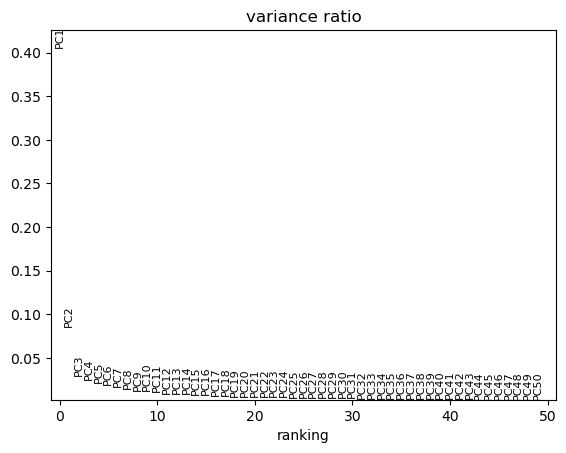

In [8]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=False)

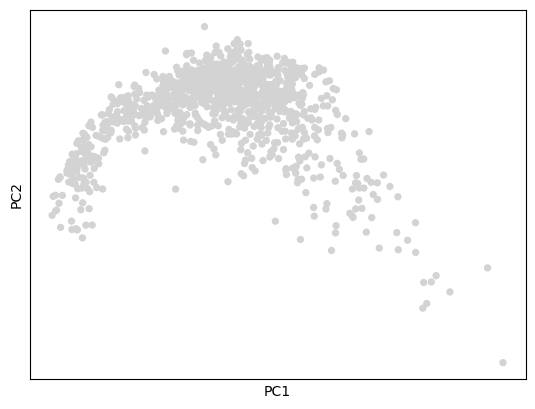

In [9]:
sc.pl.pca(adata)

In [10]:
sc.pp.neighbors(adata, n_neighbors=100, n_pcs=9)
sc.tl.umap(adata)
sc.tl.leiden(adata)

c:\Users\laure\anaconda3\envs\squidpy_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\laure\AppData\Local\Temp\ipykernel_23988\2847783993.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


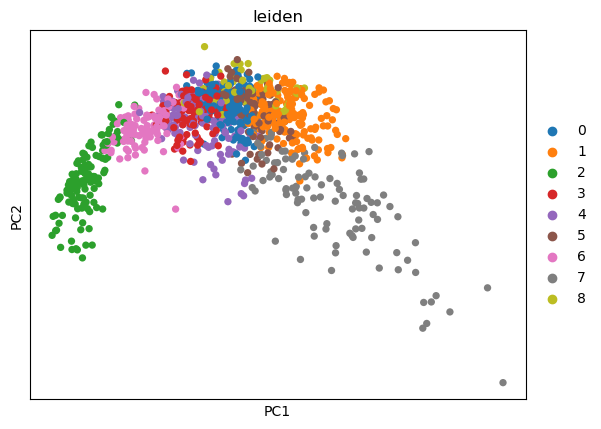

In [11]:
sc.pl.pca(adata, color="leiden")

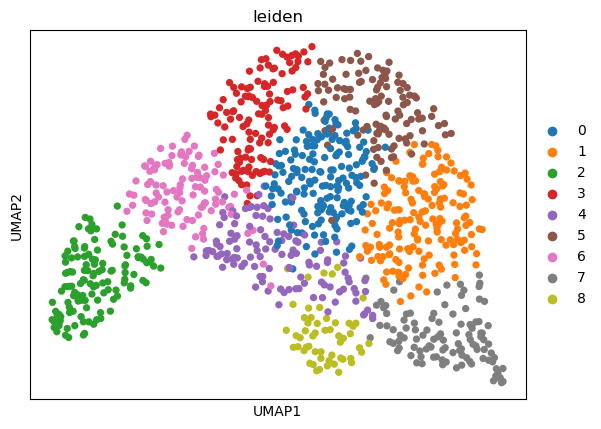

In [12]:
sc.pl.umap(adata, color="leiden")

In [2]:
def compute_pearson_correlation(matrix_a, matrix_b):
    """
    Compute a single Pearson correlation score summarizing the similarity between two matrices.
    
    Parameters:
    - matrix_a: numpy array of shape (m, n), where m is the number of rows (samples) and n is the number of features.
    - matrix_b: numpy array of shape (m, n), where m is the number of rows (samples) and n is the number of features.
                Must have the same shape as `matrix_a`.
    
    Returns:
    - overall_similarity: A single scalar Pearson correlation coefficient between the flattened matrices.
    """
    if matrix_a.shape != matrix_b.shape:
        raise ValueError("Both matrices must have the same shape.")
    
    # Flatten both matrices into 1D arrays
    flat_a = matrix_a.flatten()
    flat_b = matrix_b.flatten()
    
    # Compute Pearson correlation coefficient
    overall_similarity, _ = pearsonr(flat_a, flat_b)
    
    return overall_similarity

def compute_cosine_similarity(matrix_a, matrix_b):
    """
    Compute the Cosine Similarity between two matrices.
    
    Parameters:
    - matrix_a: numpy array of shape (m, n), where m is the number of rows (samples) and n is the number of features.
    - matrix_b: numpy array of shape (m, n), where m is the number of rows (samples) and n is the number of features.
                Must have the same shape as `matrix_a`.
    
    Returns:
    - cosine_similarity: A scalar value representing the overall Cosine Similarity between the two matrices.
    """
    if matrix_a.shape != matrix_b.shape:
        raise ValueError("Both matrices must have the same shape.")
    
    # Flatten the matrices into 1D vectors
    flat_a = matrix_a.flatten()
    flat_b = matrix_b.flatten()
    
    # Compute the dot product of the flattened vectors
    dot_product = np.dot(flat_a, flat_b)
    
    # Compute the magnitudes of the vectors
    magnitude_a = np.linalg.norm(flat_a)
    magnitude_b = np.linalg.norm(flat_b)
    
    # Compute the cosine similarity
    cosine_similarity = dot_product / (magnitude_a * magnitude_b)
    
    return cosine_similarity

def min_max_normalize(matrix):
    return (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))

def sigmoid(x):
    """
    Compute the sigmoid of x.

    Args:
        x: A scalar, numpy array, or other iterable.

    Returns:
        The sigmoid value(s) as a numpy array or scalar.
    """
    return 1 / (1 + np.exp(-x))

In [3]:
# Path to the large zip file and the directory of batch zip files
large_zip_path = "val_structures.zip"
batch_zip_dir = "predicted_val"

# Step 1: Load the large zip file into a dictionary
with zipfile.ZipFile(large_zip_path, 'r') as large_zip:
    large_npy_files = [f for f in large_zip.namelist() if f.endswith('.npy')]
    large_data = {os.path.basename(f): np.load(large_zip.open(f), allow_pickle=True) for f in tqdm(large_npy_files, desc="Loading Large Zip")}
# Step 2: Iterate over batch zip files and compute scores
batch_zip_files = [os.path.join(batch_zip_dir, f) for f in os.listdir(batch_zip_dir) if f.endswith('.zip')]
scores = []
print(batch_zip_files)
# Iterate over batch zip files
for batch_zip_path in tqdm(batch_zip_files, desc="Processing Batches"):
    with zipfile.ZipFile(batch_zip_path, 'r') as batch_zip:
        # Load the current batch of .npy files
        batch_npy_files = [f for f in batch_zip.namelist() if f.endswith('.npy')]
        batch_data = {os.path.basename(f): np.load(batch_zip.open(f), allow_pickle=True) for f in batch_npy_files}

        # Compute similarity scores for corresponding .npy files
        for file_name, batch_array in batch_data.items():
            if file_name in large_data:
                # Fetch the corresponding array from the large zip store
                large_array = large_data[file_name]
                # Compute the similarity score
                if batch_array.shape != large_array.shape or batch_array.shape[0] < 2:
                    print(f"Skipping {file_name} due to incompatible shape: {batch_array.shape}.")
                    continue

                min_max_normalized_batch_array = min_max_normalize(batch_array)
                sigmoid_normalized_batch_array = sigmoid(batch_array)
                large_array_binned = np.where(large_array < 8, 1, 0)

                pearson_correlation_min_max = compute_pearson_correlation(min_max_normalized_batch_array, large_array_binned)
                cosine_similarity_min_max = compute_cosine_similarity(min_max_normalized_batch_array, large_array_binned)

                pearson_correlation_sigmoid = compute_pearson_correlation(sigmoid_normalized_batch_array, large_array_binned)
                cosine_similarity_sigmoid = compute_cosine_similarity(sigmoid_normalized_batch_array, large_array_binned)

                diagonal_matrix = np.eye(large_array.shape[0], large_array.shape[1])
                pearson_baseline = compute_pearson_correlation(diagonal_matrix, large_array_binned)
                cosine_baseline = compute_cosine_similarity(diagonal_matrix, large_array_binned)

                # Append the result to the scores list
                file_id = os.path.splitext(file_name)[0]
                scores.append({"id": file_id, 
                                "pearson_correlation_min_max": pearson_correlation_min_max,
                                "cosine_similarity_min_max": cosine_similarity_min_max, 
                                "pearson_correlation_sigmoid": pearson_correlation_sigmoid,
                                "cosine_similarity_sigmoid": cosine_similarity_sigmoid,
                                "pearson_baseline": pearson_baseline,
                                "cosine_baseline": cosine_baseline})

        # Clear memory by removing the current batch's data
        batch_data.clear()

# Step 3: Convert scores to a DataFrame and save
scores_df = pd.DataFrame(scores)
scores_df.to_parquet("val_similarity_scores.parquet", index=False)

print("Processing complete. Scores saved to similarity_scores.parquet.")

Loading Large Zip: 100%|██████████| 1080/1080 [00:02<00:00, 382.94it/s]


['D://main_drive//Part 2//BioinformatikStudium//WiSe2024_25//Protein Prediction 2/predicted_val\\val_0_split.zip']


Processing Batches: 100%|██████████| 1/1 [00:20<00:00, 20.97s/it]

Processing complete. Scores saved to similarity_scores.parquet.


In [13]:
scores = pd.read_parquet("val_similarity_scores.parquet")

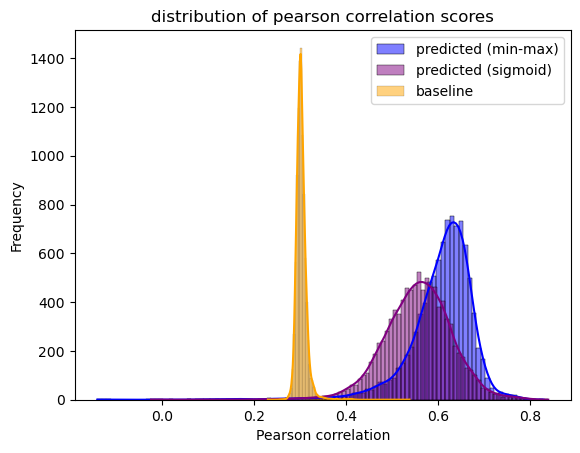

In [8]:
sns.histplot(scores['pearson_correlation_min_max'], bins=100, kde=True, color='blue', label='predicted (min-max)')
sns.histplot(scores['pearson_correlation_sigmoid'], bins=100, kde=True, color='purple', label = 'predicted (sigmoid)')
sns.histplot(scores['pearson_baseline'], bins=100, kde=True, color='orange', label='baseline')
plt.xlabel('Pearson correlation')
plt.ylabel('Frequency')
plt.title('distribution of pearson correlation scores')
plt.legend()  # Show legend to distinguish distributions
#plt.show()
plt.savefig("pearson_correlation_scores.png", dpi=300)

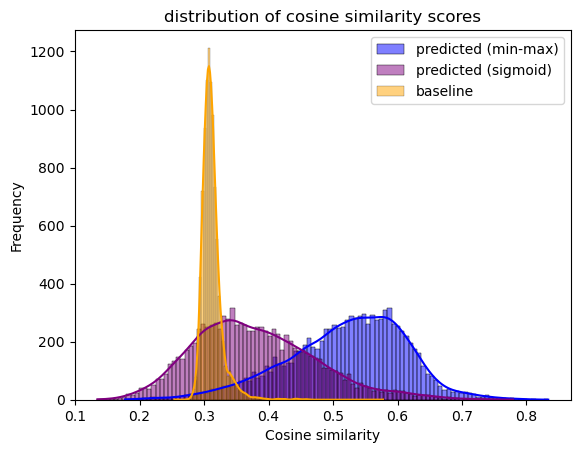

In [9]:
sns.histplot(scores['cosine_similarity_min_max'], bins=100, kde=True, color='blue', label='predicted (min-max)')
sns.histplot(scores['cosine_similarity_sigmoid'], bins=100, kde=True, color='purple', label = 'predicted (sigmoid)')
sns.histplot(scores['cosine_baseline'], bins=100, kde=True, color='orange', label='baseline')
plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.title('distribution of cosine similarity scores')
plt.legend()  # Show legend to distinguish distributions
#plt.show()
plt.savefig("cosine_similarity_scores.png", dpi=300)

In [14]:
scores.index = scores['id']
scores.index.name = None
scores.drop(columns=['id'], inplace=True)
scores

,pearson_correlation_min_max,cosine_similarity_min_max,pearson_correlation_sigmoid,cosine_similarity_sigmoid,pearson_baseline,cosine_baseline
2y8y-A,0.646823,0.600085,0.585549,0.380387,0.300102,0.307552
5lyg-A,0.561422,0.537994,0.508557,0.358703,0.299533,0.307551
3u52-E,0.618220,0.535368,0.604660,0.437279,0.315351,0.327228
4r23-B,0.589619,0.491247,0.506377,0.283317,0.290925,0.294852
2epl-X,0.633877,0.475843,0.531818,0.231781,0.299268,0.301735
...,...,...,...,...,...,...
3spa-A,0.563560,0.430627,0.430200,0.180226,0.303574,0.305159
1sz7-A,0.620238,0.570769,0.553593,0.415235,0.299425,0.308838
3m9l-A,0.516868,0.350291,0.481401,0.380562,0.302388,0.309920
1yfq-A,0.598345,0.408150,0.540396,0.307970,0.295760,0.300237


In [15]:
adata.obs = pd.concat([adata.obs, scores], axis=1)

In [16]:
adata

AnnData object with n_obs × n_vars = 1080 × 1280
    obs: 'leiden', 'pearson_correlation_min_max', 'cosine_similarity_min_max', 'pearson_correlation_sigmoid', 'cosine_similarity_sigmoid', 'pearson_baseline', 'cosine_baseline'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [17]:
adata.write_h5ad("val_adata.h5ad")

In [29]:
sc.set_figure_params(dpi_save=300)

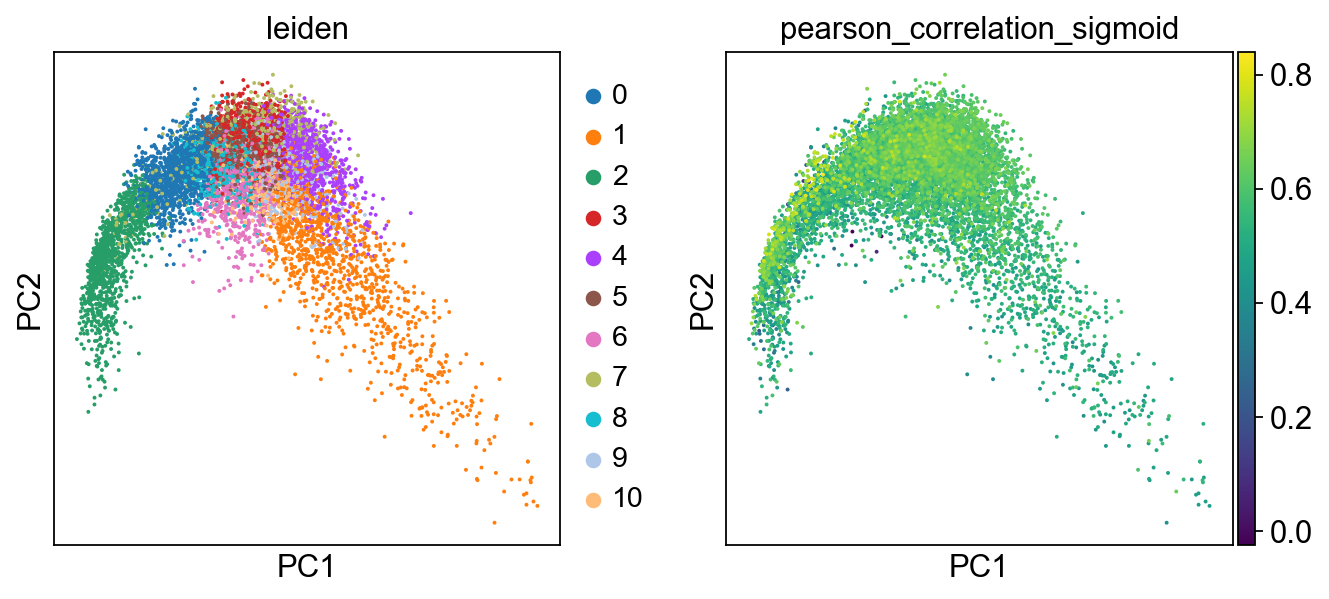

In [30]:
sc.pl.pca(adata, color=["leiden","pearson_correlation_sigmoid"], save="_pearson_correlation_sigmoid.png")

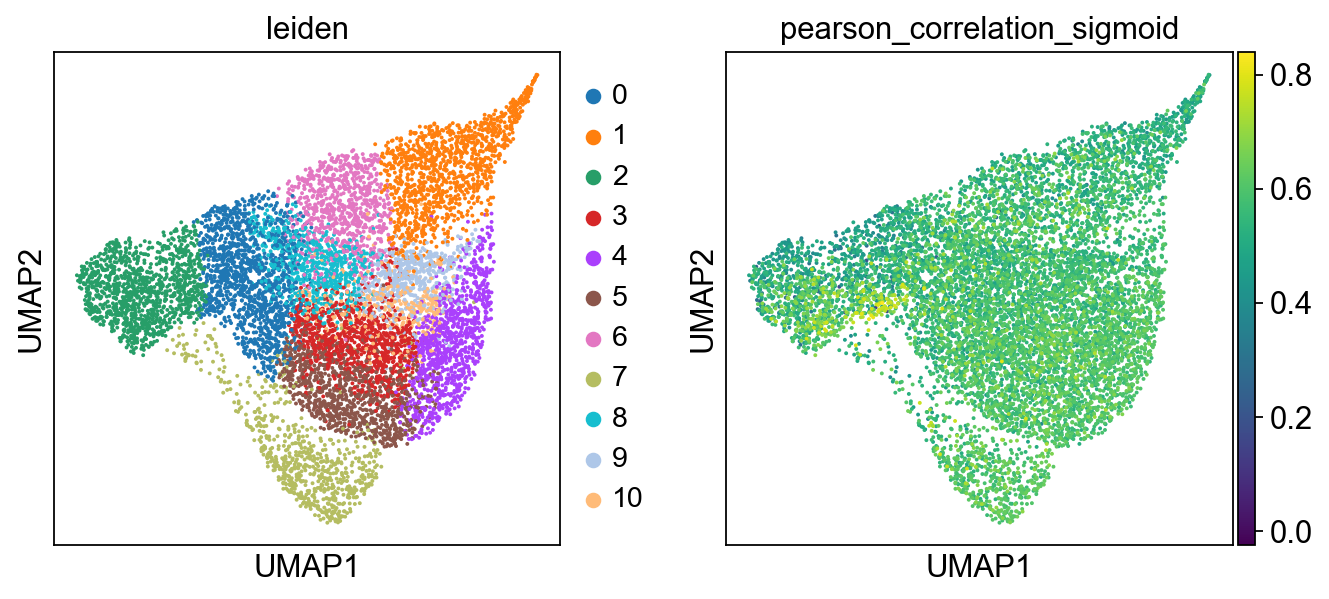

In [32]:
sc.pl.umap(adata, color=["leiden","pearson_correlation_sigmoid"], save="_pearson_correlation_sigmoid.png")

In [21]:
df = pd.DataFrame(adata.obsm["X_pca"])

In [22]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.315498,0.245640,0.170614,-0.201231,-0.187512,0.139690,-0.378308,-0.155661,0.321581,0.404061,...,-0.015122,-0.168707,-0.008422,0.009828,-0.072684,-0.074504,-0.083364,0.113911,0.076642,0.087606
1,-0.681991,0.264124,-0.170019,0.291610,-0.282235,0.016609,-0.311043,0.113345,-0.028253,0.124595,...,0.013533,-0.238887,-0.057159,-0.044968,-0.023737,0.099357,-0.017117,0.031705,0.055227,0.074111
2,-0.812512,0.259977,-0.347582,0.086722,0.450741,0.465527,-0.436538,0.152977,-0.125439,0.111315,...,0.010233,-0.021072,0.076670,-0.021542,0.015039,0.077922,0.189558,0.151775,0.119446,-0.058893
3,4.504939,-2.309304,-0.256104,0.350080,-0.059852,0.521343,0.155921,-0.036371,0.140431,0.068763,...,0.035744,-0.196659,-0.096617,0.074948,0.082442,-0.263395,0.152588,-0.178302,-0.085409,-0.050194
4,1.192718,0.277878,0.216946,0.049140,0.665769,0.183385,0.228503,-0.068850,0.204285,0.133916,...,0.141417,0.055595,-0.053794,-0.065016,0.132309,0.020359,0.159005,0.044238,-0.091747,0.154715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,-1.159328,-0.019790,-0.026574,-1.063538,-0.551639,-0.022330,-0.231919,-0.572129,0.731189,-0.645243,...,0.025475,0.549634,0.175884,0.092561,0.058069,0.087675,-0.016214,0.096033,-0.016763,-0.069614
9707,-2.305460,0.344906,0.079853,-0.374633,-0.166926,-0.086567,-0.732993,-0.218952,0.170957,-0.053765,...,-0.008035,-0.140029,0.031691,0.179824,-0.083683,-0.145091,-0.045218,-0.123513,0.075599,-0.161277
9708,0.080798,-0.660382,-0.055055,-0.903980,-0.635712,-0.379562,0.274624,0.264708,0.002160,0.373253,...,0.062317,0.201459,-0.060755,0.019052,0.003980,0.128987,-0.081362,-0.116986,0.043094,-0.136065
9709,1.890780,0.508480,0.215254,0.445367,0.212925,0.461379,0.324251,-0.267105,0.515019,0.245462,...,0.107581,0.091808,-0.237372,0.008959,0.260649,0.101044,0.048024,-0.080979,-0.010760,-0.053894


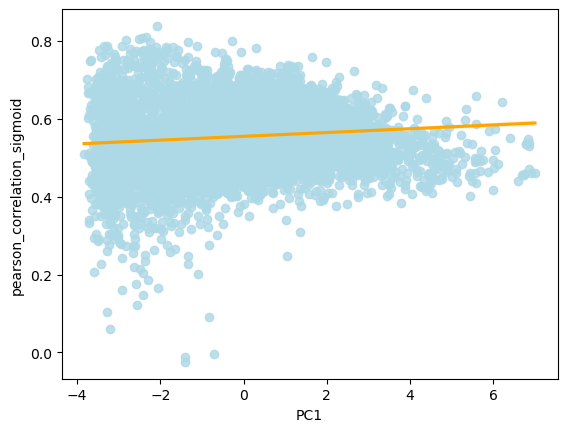

In [31]:
sns.regplot(x=df[0], y=adata.obs["pearson_correlation_sigmoid"], scatter_kws={'color': 'lightblue'}, line_kws={'color': 'orange'},)
plt.xlabel('PC1')
plt.savefig("PC1_pearson_correlation_sigmoid.png")


In [29]:
train = sc.read_h5ad("adata.h5ad")
train.obs["split"] = "train"
val = sc.read_h5ad("val_adata.h5ad")
val.obs["split"] = "validation"
adata = train.concatenate(val)
adata.obs

C:\Users\laure\AppData\Local\Temp\ipykernel_23988\625867216.py:5: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = train.concatenate(val)


,leiden,pearson_correlation_min_max,cosine_similarity_min_max,pearson_correlation_sigmoid,cosine_similarity_sigmoid,pearson_baseline,cosine_baseline,split,batch
3kb4-B-0,0,0.625470,0.488580,0.564328,0.366000,0.311821,0.318804,train,0
2fcl-A-0,0,0.585225,0.512820,0.547248,0.421689,0.312899,0.322891,train,0
3d0j-A-0,3,0.585639,0.512161,0.551225,0.420713,0.307640,0.318511,train,0
1uw4-A-0,1,0.554738,0.581630,0.524176,0.464345,0.306667,0.322490,train,0
3scy-A-0,9,0.614174,0.484146,0.574984,0.315587,0.283422,0.287994,train,0
...,...,...,...,...,...,...,...,...,...
4g7n-A-1,6,0.561610,0.406158,0.480642,0.345108,0.310048,0.316664,validation,1
1gxr-A-1,4,0.630673,0.453867,0.554314,0.321056,0.286893,0.291628,validation,1
4a5u-B-1,3,0.653307,0.635763,0.670881,0.493097,0.307411,0.325300,validation,1
4p82-A-1,1,0.615226,0.544589,0.600694,0.383664,0.298134,0.306506,validation,1


In [19]:
adata

AnnData object with n_obs × n_vars = 10791 × 1280
    obs: 'leiden', 'pearson_correlation_min_max', 'cosine_similarity_min_max', 'pearson_correlation_sigmoid', 'cosine_similarity_sigmoid', 'pearson_baseline', 'cosine_baseline', 'split'
    obsm: 'X_pca', 'X_umap'

In [30]:
del adata.obs["leiden"]
del adata.obs["batch"]
del adata.obsm["X_pca"]
del adata.obsm["X_umap"]

In [31]:
sc.tl.pca(adata, n_comps=50)

In [32]:
adata.write_h5ad("train_val_adata.h5ad")

In [33]:
adata.obs["split"].value_counts()

split
train         9711
validation    1080
Name: count, dtype: int64